In [1]:
import numpy as np
import networkx as nx

In [2]:
N = 10
S = 2
B = 10
r = 1

In [31]:
grid = np.array([[0,1,1,1,1],
                [0,1,1,1,2],
                [0,0,0,2,2],
                [3,0,3,2,2],
                [3,3,3,4,4]])
star = np.array([[0,1,0,0,0],
                [0,0,0,0,1],
                [0,0,1,0,0],
                [1,0,0,0,0],
                [0,0,0,1,0]])

In [3]:
def starbattle_generator(S, N, n_attempts=0, n_fails=0):
    Stot = S*N
    success = False
    coord_grid = np.arange(N*N)
    good_coords = np.zeros((Stot,2), dtype=int)
    #n_attempts = 0
    while not success:
        n_attempts += 1
        coord_grid = np.arange(N*N)
        np.random.shuffle(coord_grid)
        coord_grid = np.array([(i//N,i%N) for i in coord_grid])
        stars = np.zeros((N,N), dtype=int)
        n_placed_stars = 0
        for coord in coord_grid:
            row = np.sum(stars[coord[0]])
            col = np.sum(stars[:,coord[1]])
            rl = max(coord[0]-r, 0)
            rh = min(coord[0]+r+1, N)
            cl = max(coord[1]-r, 0)
            ch = min(coord[1]+r+1, N)
            reg = np.sum(stars[rl:rh, cl:ch])
            if  (row<N) and (col<N) and (reg == 0):
                stars[tuple(coord)] = 1
                good_coords[n_placed_stars,:] = coord
                n_placed_stars += 1
                if n_placed_stars == Stot:
                    success = True
                    #print(star, n_attempts)
                    break
            else:
                continue
    grid = np.zeros((N*N), dtype=int)
    for n in range(N*N):
        n_coord = (n//N, n%N)
        best_dist = 2*N
        for ind, star in enumerate(good_coords):
            dist = (n_coord[0]-star[0])**2 + (n_coord[1] - star[1])**2
            if best_dist > dist:
                best_dist = dist
                grid[n] = ind
    grid = grid.reshape(N,N)
    nn = grid.max()
    tmp = np.zeros((nn+1, nn+1), bool)

    # check the vertical adjacency
    a, b = grid[:-1, :], grid[1:, :]
    tmp[a[a!=b], b[a!=b]] = True

    # check the horizontal adjacency
    a, b = grid[:, :-1], grid[:, 1:]
    tmp[a[a!=b], b[a!=b]] = True

    # register adjacency in both directions (up, down) and (left,right)
    result = (tmp | tmp.T).astype(int)
    neighs = [[ii, list(np.flatnonzero(row))] for ii, row in enumerate(result)]
    neighs = sorted(neighs, key=lambda x: len(x[1]))
    if len(neighs[0][1]) < S-1:
        return starbattle_generator(S, N, n_attempts=n_attempts, n_fails=n_fails)
    failed = True
    new_fails = 0
    while failed:
        neighbors = neighs[:]
        #display(neighbors)
        regs = []
        reg_size = 0
        while reg_size < N:
            if len(neighbors[0][1]) < S-1:
                failed = True
                new_fails += 1
                break
            cand = np.random.choice(neighbors[0][1], S-1, replace=False)
            cand = [neighbors[0][0], *cand]
            regs.append(cand)
            #print(regs, cand)
            reg_size += 1
            n2 = neighbors[:]
            to_del = []
            for ind, neigh in enumerate(neighbors):
                #print(ind, neigh)
                if neigh[0] in cand:
                    to_del += [ind]
                else:
                    for el in cand:
                        if el in neigh[1]:
                            n2[ind][1].remove(el)
            for el in reversed(to_del):
                del n2[el]
            neighbors = n2
            failed = False
        if new_fails > 3:
            return starbattle_generator(S, N, n_attempts=n_attempts, n_fails=n_fails+new_fails)
    print("It took {} attempt(s) to generate the stars.".format(n_attempts))
    print("It took {} attempt(s) to generate the regions.".format(n_fails+1))
    #display(neighbors,regs)
    for ind, reg in enumerate(regs):
        grid[grid == reg[0]] = -ind-1
        grid[grid == reg[1]] = -ind-1
    grid = -grid-1
    return grid, stars

In [5]:
grid, stars = starbattle_generator(2,10)
display(grid, stars)

It took 1 attempt(s) to generate the stars.
It took 1 attempt(s) to generate the regions.


[]

[[3, 4],
 [12, 9],
 [17, 1],
 [18, 19],
 [8, 13],
 [11, 6],
 [14, 2],
 [7, 15],
 [5, 0],
 [16, 10]]

array([[3, 3, 4, 4, 4, 4, 7, 7, 7, 1],
       [3, 3, 4, 4, 4, 4, 7, 7, 1, 1],
       [3, 3, 4, 4, 8, 8, 7, 1, 1, 1],
       [3, 8, 8, 8, 8, 8, 7, 7, 1, 1],
       [8, 8, 8, 9, 8, 8, 7, 5, 5, 5],
       [2, 2, 9, 9, 9, 9, 9, 5, 5, 5],
       [2, 2, 2, 6, 9, 9, 9, 5, 5, 5],
       [2, 2, 6, 6, 6, 0, 0, 5, 5, 5],
       [2, 2, 6, 6, 0, 0, 0, 0, 0, 0],
       [2, 6, 6, 6, 0, 0, 0, 0, 0, 0]])

array([[1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0]])

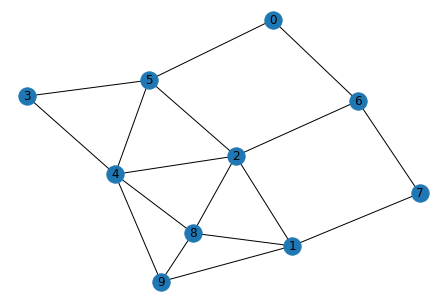

In [136]:
G = nx.Graph()
for ind, neigh in enumerate(test):
    G.add_edges_from([[ind, ne] for ne in neigh])
nx.draw_spring(G, with_labels=True)

In [ ]:
from itertools import product
from string import ascii_uppercase as ABC
from time import time


def _insert_newlines(string, every=128):
    return "\n".join(string[i:i + every] for i in range(0, len(string), every))


def main(grid):
    t0 = time()
    S = grid.count("\n")
    LENGHT = S * S
    N = int(grid[0])
    TOTAL = N * S
    grid = "".join(grid[1:].split())
    possibles = tuple(set(i for i in range(LENGHT) if grid[i] is l)
                    for l in ABC[:S])
    regions = sorted(range(S), key=lambda x: grid.count(ABC[:S][x]))
    adjacent = []
    for a in range(LENGHT):
        cols = [0]
        rows = [0]
        if a % S > 0:
            cols.append(-1)
        if a % S < S - 1:
            cols.append(1)
        if a // S > 0:
            rows.append(-S)
        if a // S < S - 1:
            rows.append(S)
        adjacent.append(set(a + sum(i) for i in product(cols, rows)))
    cs = tuple(set(range(i, LENGHT, S)) for i in range(S))
    rs = (0,) * S + tuple(set(range(i * S, i * S + S)) for i in range(S))
    cr = tuple((i % S, i // S + S) for i in range(LENGHT))

    def solve(grid, impossibles, colrows, count=0):
        if count == TOTAL:
            return grid
        for a in possibles[regions[count // N]] - impossibles:
            c, r = cr[a]
            tryimpossibles = impossibles | adjacent[a]
            trycolrows = colrows[:]
            trycolrows[c] += 1
            trycolrows[r] += 1
            if trycolrows[c] == N:
                tryimpossibles.update(cs[c])
            if trycolrows[r] == N:
                tryimpossibles.update(rs[r])
            s = solve(grid + (a,), tryimpossibles, trycolrows, count + 1)
            if s:
                break
        else:
            return None
        return s
    s = solve((), set(), bytearray(S + S))
    if s:
        s = "".join("*" if i in s else "." for i in range(LENGHT))
        print(_insert_newlines(s, S))
    print("Took", time() - t0, "seconds")